 # 1. 퍼셉트론에서 신경망으로
 
 신경망을 그림으로 나타내면 아래와 같다. 총 3개의 층으로 나타낼 수 있다.

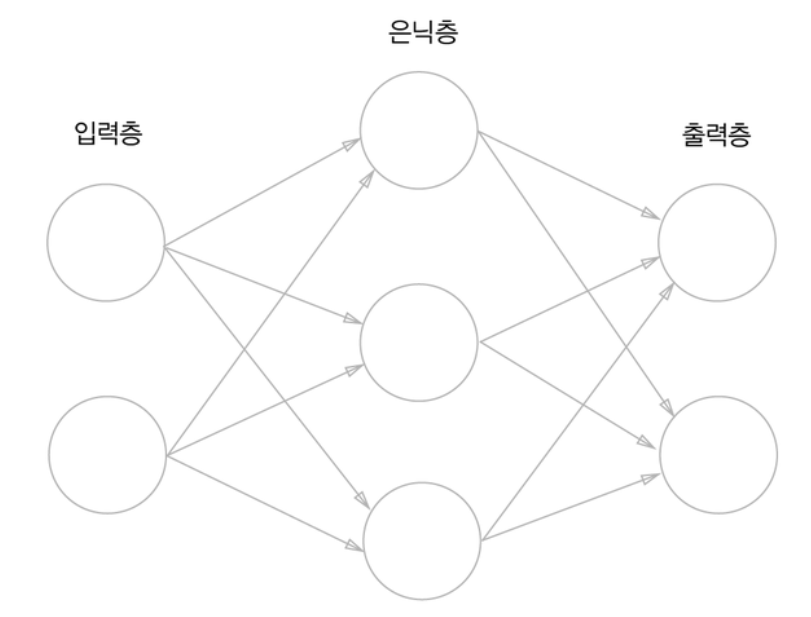

 # 2. 활성화 함수
 
 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화함수라 한다. 일반적으로 퍼셉트론에서는 활성화 함수로 계단 함수(어떤 임계치를 기준으로 0과 1이 나뉨)을 사용한다. 하지만 계단 함수 이외의 함수는 무엇이 있는지 알아보자

 - 계단 함수

In [3]:
# 계단 함수 구현하기
# 아래 함수에서 x는 실수 값만을 받음 (numpy 배열값은 불가)
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0


In [1]:
# 넘파이 배열 지원
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [7]:
y = x > 0
y # y는 bool 배열 따라서 0과 1로 표현
y = y.astype(np.int)
y

array([0, 1, 1])

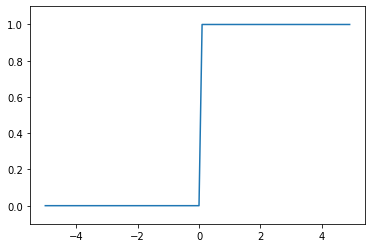

In [7]:
# 계단 함수의 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0,5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y 축의 범위 지정
plt.show()

 - 시그모이드 함수
 
 시그모이드 함수는 모든 값을 0~1사이의 결과를 출력한다
 
 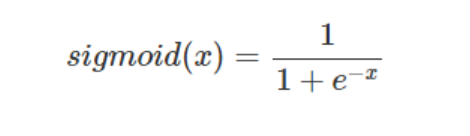

In [4]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [6]:
# 브로드캐스트 기능을 활용하여 시그모이드 함수 사용
t = np.array([1.0,2.0,3.0])

1.0 + t # array([2., 3., 4.])
1.0/t # array([1.        , 0.5       , 0.33333333])

array([1.        , 0.5       , 0.33333333])

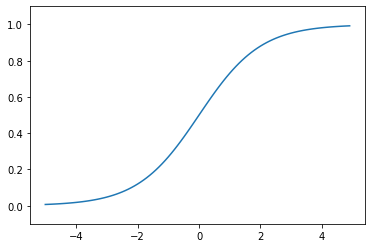

In [8]:
# 시그모이드 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

 - 시그모이드 함수와 계단 함수 비교


시그모이드 함수와 계단 함수의 가장 큰 차이점은 매끄러움일 것이다. 이와 같이 시그모이드 함수와 같이 비선형 함수를 사용하는 이유는 신경망에서 활성함수는 비선형 함수를 사용해야하기 때문이다. 달리말하면 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 

# 3. ReLU 함수

시그모이드 함수는 신경망 분야에서 오래전부터 사용했으나 최근에는 ReLU(rectified Linear Unit) 함수를 주로 이용합니다. ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수입니다.

In [10]:
# ReLU 함수 구현
def relu(x):
    return np.maximum(0,x)

# ReLU 함수는 챕터 후반에 다시 활용.

 # 4. 다차원 배열의 계산
 
 넘파이의 다차원 배열을 사용한 계산법을 숙달하면 효율적으로 구현할 수 있다. 이번 절에서 넘파이의 다차원 배열 계싼에 대해 설명한 뒤 신경망을 구현해보자.

In [16]:
# 다차원 배열
# 1차원 배열
import numpy as np
a = np.array([1,2,3,4])
print(a)

np.ndim(a) # 1

a.shape # (4,)

a.shape[0] # 4

[1 2 3 4]


4

In [17]:
# 2차원 배열
b = np.array([[1,2],[3,4],[5,6]])
print(b)

np.ndim(b)

b.shape

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

In [22]:
# 행렬의 곱
a = np.array([[1,2,3],[4,5,6]])
a.shape # (2,3)

b = np.array([[1,2],[3,4],[5,6]])
b.shape # (3,2)

np.dot(a,b)

array([[22, 28],
       [49, 64]])

In [24]:
# 잘못된 곱으 했었을 때
c = np.array([[1,2],[3,4]])
c.shape

np.dot(a,c)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [28]:
# 신경망에서 행렬의 곱
x = np.array([1,2])
x.shape # (2,)

w = np.array([[1,3,5],[2,4,6]])
print(w)

w.shape # (2,3)

y = np.dot(x,w)
print(y)

[[1 3 5]
 [2 4 6]]
[ 5 11 17]


In [32]:
# 3층 신경망 구현하기
# 입력층에서 1층으로의 전달
x = np.array([1.0,0.5])
w1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])

print(w1.shape) # (2,3)
print(x.shape) # (2,)
print(b1.shape) # (3,)

a1 = np.dot(x, w1) + b1

z1 = sigmoid(a1)

(2, 3)
(2,)
(3,)


In [31]:
print(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [34]:
# 1층에서 2층으로의 신호전달
w2 = np.array([[0.1,0.4], [0.2,0.5],[0.3,0.6]])
b2 = np.array([0.1,0.2])

print(z1.shape)
print(w2.shape)
print(b2.shape)

a2 = np.dot(z1, w2) +b2

z2 = sigmoid(a2)

(3,)
(3, 2)
(2,)


In [36]:
# 2층에서 출력층으로의 신호전달
def identity_function(x):
    return x

w3 = np.array([[0.1,0.3],[0.2,0.4]])
b3 = np.array([0.1,0.2])

a3 = np.dot(z2,w3) + b3
y = identity_function(a3) # 혹은 y = a3
y

array([0.31682708, 0.69627909])

In [38]:
# 구현 정리
def init_network():
    network = {}
    network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([[0.1,0.2,0.3]])
    network['w2'] = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['w3'] = np.array([[0.1,0.3], [0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,w2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y) # [[0.31682708 0.69627909]]

[[0.31682708 0.69627909]]


 # 5.출력층 설계하기
    
신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중에 어떤 문제이냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 항등 함수를, 분류에는 소프트 맥스 함수를 사용한다.


 - 항등 함수와 소프트맥스 함수 구현하기
 
 항등 함수는 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 뜻이다. 
 
 한편 분류에서 사용하는 소프트맥스 함수의 식은 아래와 같다. 
 
 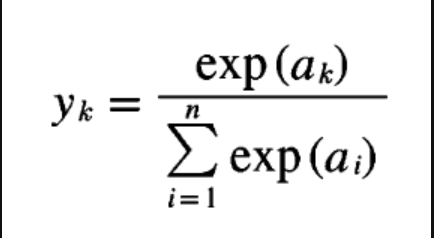

In [43]:
# 항등 함수 구현하기
def identity(x):
    return x

In [42]:
# 소프트맥스 함수 구현하기
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수함수
print(exp_a) 

sum_exp_a = np.sum(exp_a) # 지수함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [44]:
# 소프트함수 일반화
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

 - 소프트맥스 함수 구현시 주의점

soft 함수의 코드는 컴퓨터로 계산시 오버플로라는 결함이 있다. e값이 커질 수 있다는 문제가 있다. 이를 개선하기 위해 아래와 같이 개선했다.

In [51]:
# 소프트함수 개선 작업
a = np.array([1010, 1000, 990]) # 큰 값
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산


C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

In [54]:
# 위 문제를 해결하기 위해 
c = np.max(a) # a의 최대값
a-c # array([  0, -10, -20]) 값의 크기를 줄임

np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [55]:
# 개선된 소프트함수 일반화
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

- 소프트맥스 함수의 특징

소프트 맥스 함수의 출력은 0에서 1.0 사이의 실수입니다. 또 소프트맥스 함수 출력의 총합은 1입니다. 출력 총합이 1이 된다는 점은 소프트 맥스 함수의 중요한 성질이며 이 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할 수 있다.

In [57]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

 - 출력층의 뉴런 수 정하기
 
 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야한다. 분류에서 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다. 예를 들어 이미지를 숫자 0부터 9까지 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정한다.

 # 6. 예제_손글씨 숫자 인식
 
위에서 학습한 것을 활용해보자. 이번절에서 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현하자. 이러한 추론 과정을 신경망의 순전파(forward propagation)이라고 한다.

아래의 예제에서 4개의 계층으로 구성된 심층 신경망을 이용해보자
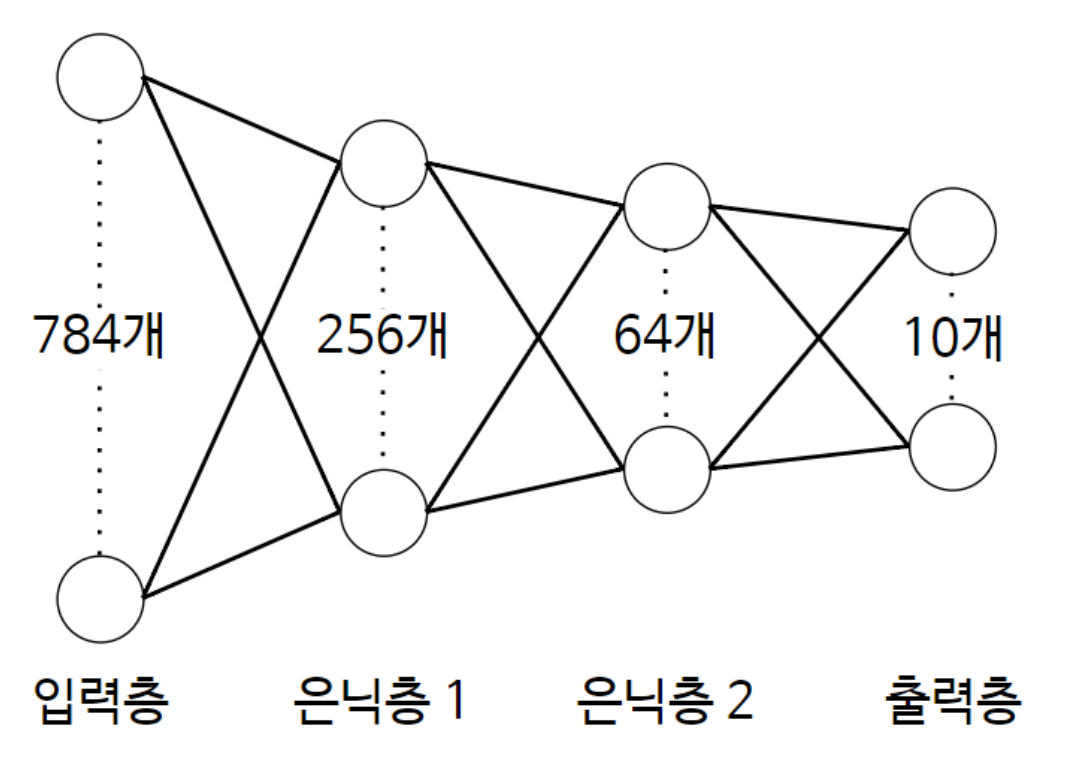

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True) # one_hot 방식은 각 픽셀이 존재하거나 하지않거나를 0과 1로 표현

# 신경망 모델 구성
# 이미지는 28x 28 픽셀로 원 핫 인코딩으로 784가지 특징으로 구성된다
x = tf.placeholder(tf.float32, [None, 784])

# 레이블을 0부터 9까지 총 10개로 분류
y= tf.placeholder(tf.float32, [None, 10])

# 입력층(784) -> 256 (은닉1) -> 64(은닉2) -> 10 (출력층)
# 표준 편차는 0.01로 정규분포를 가지도록 구성
w1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
l1 = tf.nn.relu(tf.matmul(x,w1))

w2 = tf.Variable(tf.random_normal([256,64], stddev=0.01))
l2 = tf.nn.relu(tf.matmul(l1,w2))

w3 = tf.Variable(tf.random_normal([64,10], stddev=0.01))
model = tf.matmul(l2,w3)

# 교차 엔트로피 손실 함수를 이용합니다.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))

# 손실값이 최소화되도록 최적화 작업 수행
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [5]:
# 신경망 모델 학습하기
# 신경망 모델은 일반적으로 배치 사이즈를 설정하여 쪼개어 학습시킵니다.
# 한번에 몇 만개나 되는 데이터를 모두 처리하는 것보다 작은 단위로 나누어 학습시키는 것이 훨씬 효과적

# 세션을 이용해 모델을 동작
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 데이터를 100개 단위로 쪼개서 학습
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# 학습 데이터를 총 10번 반복해서 학습
for epoch in range(10):
    total_cost = 0
    for i in range(total_batch):
        # 이미디 데이터, 출력 데이터를 구분해서 가져옴
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
        total_cost += cost_val
    print('반복:', '%04d' % (epoch +1), '평균 손실값:', '{:.4f}'.format(total_cost / total_batch))
    print('학습 완료')
    
# 학습 정도를 확인합니다
# 학습된 모델 값과 실제 결과 값을 비교한다.
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(y,1))
    
# 비용 함수를 적용해 정확도를 측정
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={x: mnist.test.images, y:mnist.test.labels}))
# 학습 결과를 그림으로 확인하기
labels = sess.run(model, feed_dict={x:mnist.test.images, y:mnist.test.labels})
    
        

반복: 0001 평균 손실값: 0.5235
학습 완료
반복: 0002 평균 손실값: 0.2125
학습 완료
반복: 0003 평균 손실값: 0.1415
학습 완료
반복: 0004 평균 손실값: 0.1034
학습 완료
반복: 0005 평균 손실값: 0.0798
학습 완료
반복: 0006 평균 손실값: 0.0624
학습 완료
반복: 0007 평균 손실값: 0.0490
학습 완료
반복: 0008 평균 손실값: 0.0395
학습 완료
반복: 0009 평균 손실값: 0.0317
학습 완료
반복: 0010 평균 손실값: 0.0260
학습 완료
정확도: 0.9781


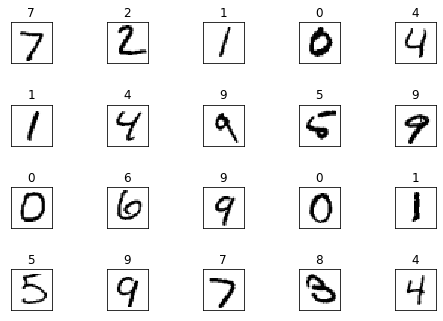

In [9]:
# 결과를 그림으로 확인하기
fig = plt.figure()

# 그림 사이에 간격을 설정
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
for i in range(20):
    # 4x5개의 테스트 이미지를 대상으로 예측을 수행
    subplot = fig.add_subplot(4,5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 예측 결과를 각 그림의 위쪽에 출력
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()